In [11]:
# pip install pandas seaborn matplotlib gradio ollama
%pip install ollama
%pip install gradio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = r'C:\Users\DeLL\Python Data Science Work\titanic_ dataset_final.csv'
df = pd.read_csv(url)   
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# Display dataset information
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


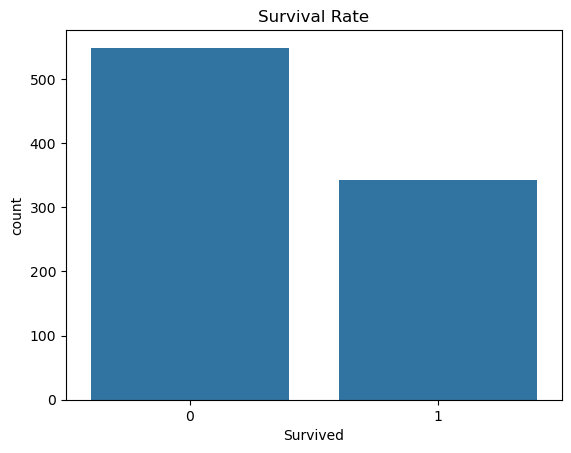

In [14]:
# Survival Rate Visualization
sns.countplot(x='Survived', data=df)    
plt.title("Survival Rate")
plt.show()  

In [10]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral",messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# General AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n AI-Generated Insights: \n", insights)


 AI-Generated Insights: 
  This dataset appears to be the Titanic passenger data, which contains information about the passengers who boarded the RMS Titanic on its maiden voyage in 1912. The summary provides key statistics for each column:

1. `PassengerId` - Unique identifiers for each passenger (count = 891, no missing values).
2. `Survived` - A binary variable indicating whether the passenger survived or not after the sinking of the Titanic (mean = 0.3838, std = 0.4865, min = 0, max = 1, with 50% of passengers not surviving).
3. `Pclass` - A categorical variable representing the class of the passenger on the ship (first, second or third) (mean = 2.3086, std = 0.8361, min = 1, max = 3). Note that the mean is not a meaningful value for categorical data.
4. `Age` - The age of each passenger (mean = 29.6991, std = 14.5265, min = 0.42, max = 80). The large standard deviation indicates a broad range of ages among passengers.
5. `SibSp` - The number of siblings and spouses aboard the Tit

In [15]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [16]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
